# XGB TRIAL1

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# ✅ 1. Load the dataset
data_path = r'C:\Users\AMON\Desktop\C200\extras\cleaned_dataset_iqrered.csv'
df = pd.read_csv(data_path)

# ✅ 2. Preprocessing
# Selecting relevant features
features = ["sqft_living", "no_of_bedrooms", "no_of_bathrooms", "sqft_lot", "no_of_floors", "house_age", "zipcode"]
target = "price"

X = df[features]
y = df[target]

# ✅ 3. One-Hot Encoding for 'zipcode'
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X[['zipcode']])

# Convert encoded data into DataFrame
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['zipcode']))
X = X.drop(columns=['zipcode'])  # Remove original categorical column
X = pd.concat([X, encoded_df], axis=1)  # Merge encoded data

# ✅ 4. Split data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 5. Train the XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=5000, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# ✅ 6. Make Predictions on Test Set
y_pred = xgb_model.predict(X_test)

# ✅ 7. Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# ✅ 8. Compute Confidence Interval for Prediction
std_dev = np.std(y_test - y_pred)
ci_min = y_pred - (1.96 * std_dev)
ci_max = y_pred + (1.96 * std_dev)

# ✅ 9. Feature Importance Analysis
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# ✅ 10. Simulating User Input (as an example)
user_input = {
    "sqft_living": 2500,  # square footage of living area
    "no_of_bedrooms": 3,  # number of bedrooms
    "no_of_bathrooms": 2,  # number of bathrooms
    "sqft_lot": 6000,  # square footage of lot
    "no_of_floors": 2,  # number of floors
    "house_age": 20,  # age of house in years
    "zipcode": "98001"  # zipcode
}

# ✅ 11. Apply One-Hot Encoding to User Input for Zipcode
user_input_df = pd.DataFrame([user_input])  # Convert to DataFrame
user_encoded = encoder.transform(user_input_df[['zipcode']])  # Apply the same encoder

# Convert encoded user input into DataFrame
encoded_user_input = pd.DataFrame(user_encoded, columns=encoder.get_feature_names_out(['zipcode']))
user_input_df = user_input_df.drop(columns=['zipcode'])  # Remove original 'zipcode' column
user_input_df = pd.concat([user_input_df, encoded_user_input], axis=1)  # Merge encoded data

# ✅ 12. Make Prediction for User Input
user_pred = xgb_model.predict(user_input_df)

# Compute Confidence Interval for User Input
user_std_dev = np.std(y_test - y_pred)  # Use test set residuals for std deviation
user_ci_min = user_pred - (1.96 * user_std_dev)
user_ci_max = user_pred + (1.96 * user_std_dev)

# ✅ 13. Display Results for User Input
print(f"User Predicted Price: {user_pred[0]}")
print(f"Confidence Interval for User Input: {user_ci_min[0]} - {user_ci_max[0]}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}\n")

print("Feature Importance:")
print(feature_importances)


User Predicted Price: 521227.84375
Confidence Interval for User Input: 341778.2648935785 - 700677.4226064215
Mean Absolute Error: 64870.84138844153
R-squared: 0.7812457839653018

Feature Importance:
          Feature  Importance
9   zipcode_98004    0.081178
19  zipcode_98023    0.060029
31  zipcode_98040    0.059020
7   zipcode_98002    0.049799
24  zipcode_98030    0.045877
..            ...         ...
40  zipcode_98065    0.000957
15  zipcode_98011    0.000939
20  zipcode_98024    0.000676
22  zipcode_98028    0.000659
68  zipcode_98155    0.000569

[76 rows x 2 columns]


# random forests code

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# ✅ 1. Load the dataset
data_path = r'C:\Users\AMON\Desktop\C200\data\processed\cleaned_dataset_iqrered.csv'
df = pd.read_csv(data_path)

# ✅ 2. Preprocessing
# Selecting relevant features
features = ["sqft_living", "no_of_bedrooms", "no_of_bathrooms", "sqft_lot", "no_of_floors", "house_age", "zipcode"]
target = "price"

X = df[features]
y = df[target]

# ✅ 3. One-Hot Encoding for 'zipcode'
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X[['zipcode']])

# Convert encoded data into DataFrame
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['zipcode']))
X = X.drop(columns=['zipcode'])  # Remove original categorical column
X = pd.concat([X, encoded_df], axis=1)  # Merge encoded data

# ✅ 4. Split data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 5. Train the Random Forest Model
rf_model = RandomForestRegressor(n_estimators=500, max_depth=20, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# ✅ 6. Make Predictions on Test Set
y_pred = rf_model.predict(X_test)

# ✅ 7. Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# ✅ 8. Compute Confidence Interval for Prediction
std_dev = np.std(y_test - y_pred)
ci_min = y_pred - (1.96 * std_dev)
ci_max = y_pred + (1.96 * std_dev)

# ✅ 9. Feature Importance Analysis
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# ✅ 10. Simulating User Input (as an example)
user_input = {
    "sqft_living": 2500,  # square footage of living area
    "no_of_bedrooms": 3,  # number of bedrooms
    "no_of_bathrooms": 2,  # number of bathrooms
    "sqft_lot": 6000,  # square footage of lot
    "no_of_floors": 2,  # number of floors
    "house_age": 20,  # age of house in years
    "zipcode": "98001"  # zipcode
}

# ✅ 11. Apply One-Hot Encoding to User Input for Zipcode
user_input_df = pd.DataFrame([user_input])  # Convert to DataFrame
user_encoded = encoder.transform(user_input_df[['zipcode']])  # Apply the same encoder

# Convert encoded user input into DataFrame
encoded_user_input = pd.DataFrame(user_encoded, columns=encoder.get_feature_names_out(['zipcode']))
user_input_df = user_input_df.drop(columns=['zipcode'])  # Remove original 'zipcode' column
user_input_df = pd.concat([user_input_df, encoded_user_input], axis=1)  # Merge encoded data

# ✅ 12. Make Prediction for User Input
user_pred = rf_model.predict(user_input_df)

# Compute Confidence Interval for User Input
user_std_dev = np.std(y_test - y_pred)  # Use test set residuals for std deviation
user_ci_min = user_pred - (1.96 * user_std_dev)
user_ci_max = user_pred + (1.96 * user_std_dev)

# ✅ 13. Display Results for User Input
print(f"User Predicted Price: {user_pred[0]:,.2f}")
print(f"Confidence Interval for User Input: {user_ci_min[0]:,.2f} - {user_ci_max[0]:,.2f}")
print(f"Mean Absolute Error: {mae:,.2f}")
print(f"R-squared: {r2:.4f}\n")

print("Feature Importance:")
print(feature_importances)


User Predicted Price: 535,744.56
Confidence Interval for User Input: 328,000.52 - 743,488.61
Mean Absolute Error: 78,107.32
R-squared: 0.7066

Feature Importance:
          Feature  Importance
0     sqft_living    0.485967
5       house_age    0.082138
3        sqft_lot    0.078808
9   zipcode_98004    0.028232
31  zipcode_98040    0.020420
..            ...         ...
16  zipcode_98014    0.000231
20  zipcode_98024    0.000183
33  zipcode_98045    0.000172
45  zipcode_98077    0.000162
67  zipcode_98148    0.000052

[76 rows x 2 columns]


# code for decision trees

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# ✅ 1. Load the dataset
data_path = r'C:\Users\AMON\Desktop\C200\data\processed\cleaned_dataset_iqrered.csv'
df = pd.read_csv(data_path)

# ✅ 2. Preprocessing
# Selecting relevant features
features = ["sqft_living", "no_of_bedrooms", "no_of_bathrooms", "sqft_lot", "no_of_floors", "house_age", "zipcode"]
target = "price"

X = df[features]
y = df[target]

# ✅ 3. One-Hot Encoding for 'zipcode'
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X[['zipcode']])

# Convert encoded data into DataFrame
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['zipcode']))
X = X.drop(columns=['zipcode'])  # Remove original categorical column
X = pd.concat([X, encoded_df], axis=1)  # Merge encoded data

# ✅ 4. Split data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 5. Train the Decision Tree Model
dt_model = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)
dt_model.fit(X_train, y_train)

# ✅ 6. Make Predictions on Test Set
y_pred = dt_model.predict(X_test)

# ✅ 7. Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# ✅ 8. Compute Confidence Interval for Prediction
std_dev = np.std(y_test - y_pred)
ci_min = y_pred - (1.96 * std_dev)
ci_max = y_pred + (1.96 * std_dev)

# ✅ 9. Feature Importance Analysis
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": dt_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# ✅ 10. Simulating User Input (as an example)
user_input = {
    "sqft_living": 2500,  # square footage of living area
    "no_of_bedrooms": 3,  # number of bedrooms
    "no_of_bathrooms": 2,  # number of bathrooms
    "sqft_lot": 6000,  # square footage of lot
    "no_of_floors": 2,  # number of floors
    "house_age": 20,  # age of house in years
    "zipcode": "98001"  # zipcode
}

# ✅ 11. Apply One-Hot Encoding to User Input for Zipcode
user_input_df = pd.DataFrame([user_input])  # Convert to DataFrame
user_encoded = encoder.transform(user_input_df[['zipcode']])  # Apply the same encoder

# Convert encoded user input into DataFrame
encoded_user_input = pd.DataFrame(user_encoded, columns=encoder.get_feature_names_out(['zipcode']))
user_input_df = user_input_df.drop(columns=['zipcode'])  # Remove original 'zipcode' column
user_input_df = pd.concat([user_input_df, encoded_user_input], axis=1)  # Merge encoded data

# ✅ 12. Make Prediction for User Input
user_pred = dt_model.predict(user_input_df)

# Compute Confidence Interval for User Input
user_std_dev = np.std(y_test - y_pred)  # Use test set residuals for std deviation
user_ci_min = user_pred - (1.96 * user_std_dev)
user_ci_max = user_pred + (1.96 * user_std_dev)

# ✅ 13. Display Results for User Input
print(f"User Predicted Price: {user_pred[0]:,.2f}")
print(f"Confidence Interval for User Input: {user_ci_min[0]:,.2f} - {user_ci_max[0]:,.2f}")
print(f"Mean Absolute Error: {mae:,.2f}")
print(f"R-squared: {r2:.4f}\n")

print("Feature Importance:")
print(feature_importances)


User Predicted Price: 482,652.89
Confidence Interval for User Input: 218,474.67 - 746,831.11
Mean Absolute Error: 105,371.50
R-squared: 0.5260

Feature Importance:
          Feature  Importance
0     sqft_living    0.626911
5       house_age    0.072636
3        sqft_lot    0.060039
9   zipcode_98004    0.033634
19  zipcode_98023    0.028491
..            ...         ...
41  zipcode_98070    0.000000
12  zipcode_98007    0.000000
45  zipcode_98077    0.000000
44  zipcode_98075    0.000000
22  zipcode_98028    0.000000

[76 rows x 2 columns]


log transformation xgb

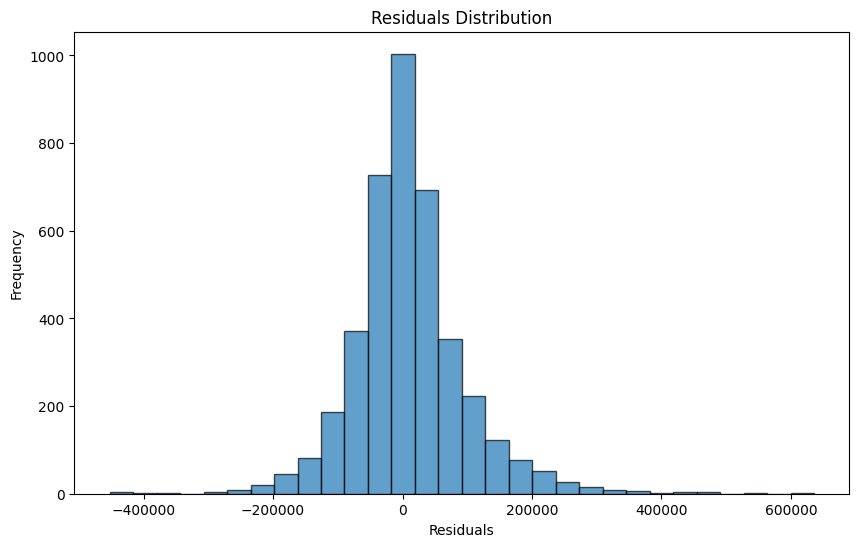

User Predicted Price: 520520.375
Confidence Interval for User Input: 350443.90423959045 - 690596.8457604095
Mean Absolute Error: 60963.88561927033
R-squared: 0.8011427886417324

Feature Importance:
                            Feature  Importance
244   no_of_bathrooms zipcode_98023    0.017571
74                    zipcode_98198    0.014687
46                    zipcode_98092    0.012996
175    no_of_bedrooms zipcode_98030    0.012018
32                    zipcode_98042    0.011956
...                             ...         ...
1306    zipcode_98022 zipcode_98045    0.000000
1307    zipcode_98022 zipcode_98052    0.000000
1308    zipcode_98022 zipcode_98053    0.000000
1309    zipcode_98022 zipcode_98055    0.000000
3001                zipcode_98199^2    0.000000

[3002 rows x 2 columns]


In [5]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
import matplotlib.pyplot as plt

# ✅ 1. Load the dataset
data_path = r'C:\Users\AMON\Desktop\C200\data\processed\cleaned_dataset_iqrered.csv'
df = pd.read_csv(data_path)

# ✅ 2. Preprocessing
# Selecting relevant features
features = ["sqft_living", "no_of_bedrooms", "no_of_bathrooms", "sqft_lot", "no_of_floors", "house_age", "zipcode"]
target = "price"

X = df[features]
y = df[target]

# ✅ 3. Log Transformation of Target Variable (Price)
y = np.log1p(y)  # Log transformation (log(x+1))

# ✅ 4. One-Hot Encoding for 'zipcode'
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X[['zipcode']])

# Convert encoded data into DataFrame
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['zipcode']))
X = X.drop(columns=['zipcode'])  # Remove original categorical column
X = pd.concat([X, encoded_df], axis=1)  # Merge encoded data

# ✅ 5. Polynomial Feature Creation
poly = PolynomialFeatures(degree=2, include_bias=False)  # Degree 2 for quadratic features
X_poly = poly.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))

# ✅ 6. Split data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# ✅ 7. Train the XGBoost Model with Hyperparameter Tuning
xgb_model = xgb.XGBRegressor(
    n_estimators=1000, 
    learning_rate=0.05, 
    max_depth=6, 
    subsample=0.8, 
    colsample_bytree=0.8, 
    random_state=42
)
xgb_model.fit(X_train, y_train)

# ✅ 8. Make Predictions on Test Set
y_pred = xgb_model.predict(X_test)

# Apply inverse log transformation to get the predicted prices back in original scale
y_pred = np.expm1(y_pred)
y_test = np.expm1(y_test)

# ✅ 9. Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# ✅ 10. Compute Confidence Interval for Prediction
std_dev = np.std(y_test - y_pred)
ci_min = y_pred - (1.96 * std_dev)
ci_max = y_pred + (1.96 * std_dev)

# ✅ 11. Feature Importance Analysis
feature_importances = pd.DataFrame({
    "Feature": X_poly.columns,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# ✅ 12. Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# ✅ 13. Simulating User Input (as an example)
user_input = {
    "sqft_living": 2500,  # square footage of living area
    "no_of_bedrooms": 3,  # number of bedrooms
    "no_of_bathrooms": 2,  # number of bathrooms
    "sqft_lot": 6000,  # square footage of lot
    "no_of_floors": 2,  # number of floors
    "house_age": 20,  # age of house in years
    "zipcode": "98001"  # zipcode
}

# ✅ 14. Apply One-Hot Encoding to User Input for Zipcode
user_input_df = pd.DataFrame([user_input])  # Convert to DataFrame
user_encoded = encoder.transform(user_input_df[['zipcode']])  # Apply the same encoder

# Convert encoded user input into DataFrame
encoded_user_input = pd.DataFrame(user_encoded, columns=encoder.get_feature_names_out(['zipcode']))
user_input_df = user_input_df.drop(columns=['zipcode'])  # Remove original 'zipcode' column
user_input_df = pd.concat([user_input_df, encoded_user_input], axis=1)  # Merge encoded data

# ✅ 15. Apply Polynomial Features Transformation to User Input
user_input_poly = poly.transform(user_input_df)

# ✅ 16. Make Prediction for User Input
user_pred = xgb_model.predict(user_input_poly)

# Apply inverse log transformation to get the predicted price back in original scale
user_pred = np.expm1(user_pred)

# Compute Confidence Interval for User Input
user_std_dev = np.std(y_test - y_pred)  # Use test set residuals for std deviation
user_ci_min = user_pred - (1.96 * user_std_dev)
user_ci_max = user_pred + (1.96 * user_std_dev)

# ✅ 17. Display Results for User Input
print(f"User Predicted Price: {user_pred[0]}")
print(f"Confidence Interval for User Input: {user_ci_min[0]} - {user_ci_max[0]}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}\n")

print("Feature Importance:")
print(feature_importances)


light gbm important

# dont toucvh above

pie chart


# dont

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18765
[LightGBM] [Info] Number of data points in the train set: 16141, number of used features: 579
[LightGBM] [Info] Start training from score 12.964625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

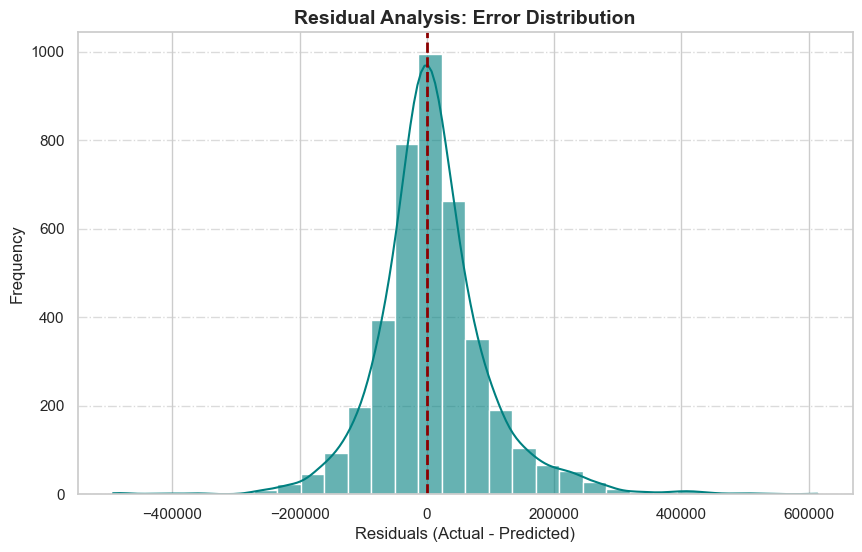

c:\Users\AMON\Desktop\C200\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


User Predicted Price: 522,902.01
Confidence Interval: 351,796.30 - 694,007.73
Mean Absolute Error: 60,946.09
R-squared: 0.7988



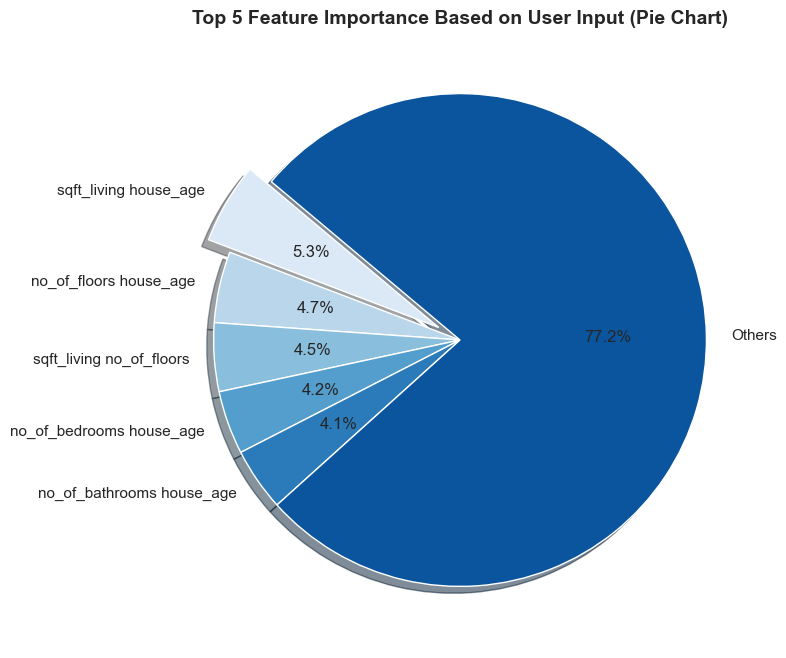

C:\Users\AMON\AppData\Local\Temp\ipykernel_11052\1669182353.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_features["Importance"][:10], y=selected_features["Feature"][:10], palette="Blues")


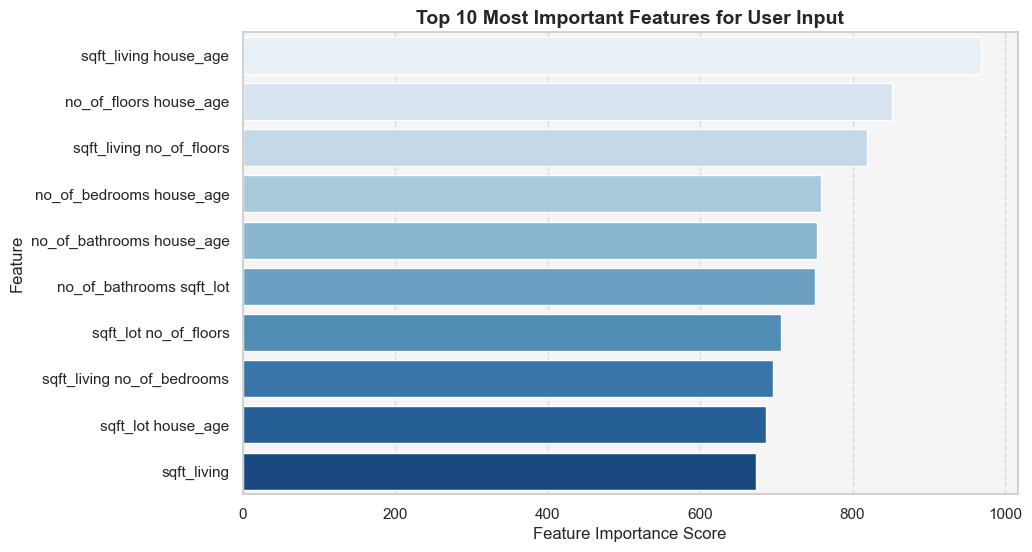

In [25]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures

# ✅ 1. Load the dataset
data_path = r'C:\Users\AMON\Desktop\C200\extras\cleaned_dataset_iqrered.csv'
df = pd.read_csv(data_path)

# ✅ 2. Preprocessing
features = ["sqft_living", "no_of_bedrooms", "no_of_bathrooms", "sqft_lot", "no_of_floors", "house_age", "zipcode"]
target = "price"

X = df[features]
y = df[target]

# ✅ 3. Log Transformation of Target Variable
y = np.log1p(y)

# ✅ 4. One-Hot Encoding for 'zipcode'
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X[['zipcode']])
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['zipcode']))
X = X.drop(columns=['zipcode'])
X = pd.concat([X, encoded_df], axis=1)

# ✅ 5. Polynomial Feature Creation
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))

# ✅ 6. Split Data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# ✅ 7. Train LightGBM Model
lgb_model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42)
lgb_model.fit(X_train, y_train)

# ✅ 8. Make Predictions
y_pred = np.expm1(lgb_model.predict(X_test))
y_test = np.expm1(y_test)

# ✅ 9. Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# ✅ 10. Confidence Interval Calculation
std_dev = np.std(y_test - y_pred)
ci_min = y_pred - (1.96 * std_dev)
ci_max = y_pred + (1.96 * std_dev)

# ✅ 11. Feature Importance Analysis (For User Input Only)
user_feature_importance = pd.DataFrame({
    "Feature": X_poly.columns,
    "Importance": lgb_model.feature_importances_
})

# Select features corresponding to the user input
selected_features = user_feature_importance[user_feature_importance['Feature'].isin(X_poly.columns)].sort_values(by="Importance", ascending=False)

# ✅ 12. Residual Analysis (Modern, Styled)
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")  # Custom background style
sns.histplot(y_test - y_pred, bins=30, kde=True, color='teal', alpha=0.6)
plt.axvline(x=0, color='darkred', linestyle='--', linewidth=2)
plt.title('Residual Analysis: Error Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Residuals (Actual - Predicted)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='-.', alpha=0.7)
plt.show()

# ✅ 13. Simulated User Input
user_input = {"sqft_living": 2500, "no_of_bedrooms": 3, "no_of_bathrooms": 2, "sqft_lot": 6000, "no_of_floors": 2, "house_age": 20, "zipcode": "98001"}
user_input_df = pd.DataFrame([user_input])
user_encoded = encoder.transform(user_input_df[['zipcode']])
encoded_user_input = pd.DataFrame(user_encoded, columns=encoder.get_feature_names_out(['zipcode']))
user_input_df = user_input_df.drop(columns=['zipcode'])
user_input_df = pd.concat([user_input_df, encoded_user_input], axis=1)
user_input_poly = poly.transform(user_input_df)
user_pred = np.expm1(lgb_model.predict(user_input_poly))

# ✅ 14. Compute Confidence Interval for User Input
user_std_dev = np.std(y_test - y_pred)
user_ci_min = user_pred - (1.96 * user_std_dev)
user_ci_max = user_pred + (1.96 * user_std_dev)

# ✅ 15. Display Prediction Results
print(f"User Predicted Price: {user_pred[0]:,.2f}")
print(f"Confidence Interval: {user_ci_min[0]:,.2f} - {user_ci_max[0]:,.2f}")
print(f"Mean Absolute Error: {mae:,.2f}")
print(f"R-squared: {r2:.4f}\n")

# ✅ 16. Feature Importance Pie Chart (Fixed, Now Works)
top_features = selected_features.head(5)
other_importance = selected_features["Importance"][5:].sum()

if other_importance > 0:
    top_features = pd.concat([top_features, pd.DataFrame({"Feature": ["Others"], "Importance": [other_importance]})])

# Normalize percentages
total_importance = top_features["Importance"].sum()
top_features["Percentage"] = (top_features["Importance"] / total_importance) * 100

# 2D Pie Chart (Fixed)
plt.figure(figsize=(8, 8))
colors = sns.color_palette("Blues", len(top_features))
explode = [0.1] + [0] * (len(top_features) - 1)

plt.pie(
    top_features["Percentage"],
    labels=top_features["Feature"],
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    explode=explode,
    shadow=True
)
plt.title("Top 5 Feature Importance Based on User Input (Pie Chart)", fontsize=14, fontweight='bold')
plt.show()

# ✅ 17. Custom Bar Chart for Feature Importance (Background Fixed)
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")  # Custom background style
sns.barplot(x=selected_features["Importance"][:10], y=selected_features["Feature"][:10], palette="Blues")
plt.xlabel("Feature Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Top 10 Most Important Features for User Input", fontsize=14, fontweight="bold")
plt.gca().set_facecolor("#F5F5F5")  # Set custom background color
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008912 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18765
[LightGBM] [Info] Number of data points in the train set: 16141, number of used features: 579
[LightGBM] [Info] Start training from score 12.964625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

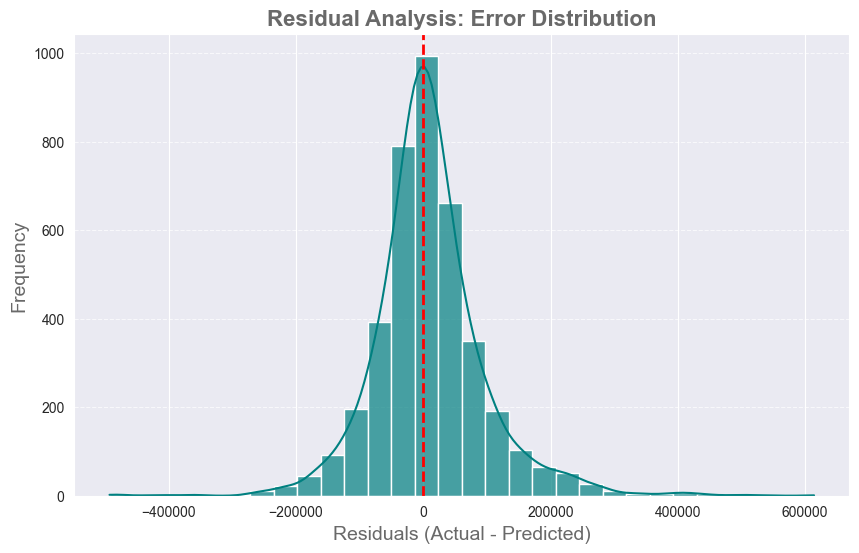

c:\Users\AMON\Desktop\C200\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


User Predicted Price: 758,756.09
Confidence Interval: 587,650.38 - 929,861.81
Mean Absolute Error: 60,946.09
R-squared: 0.7988



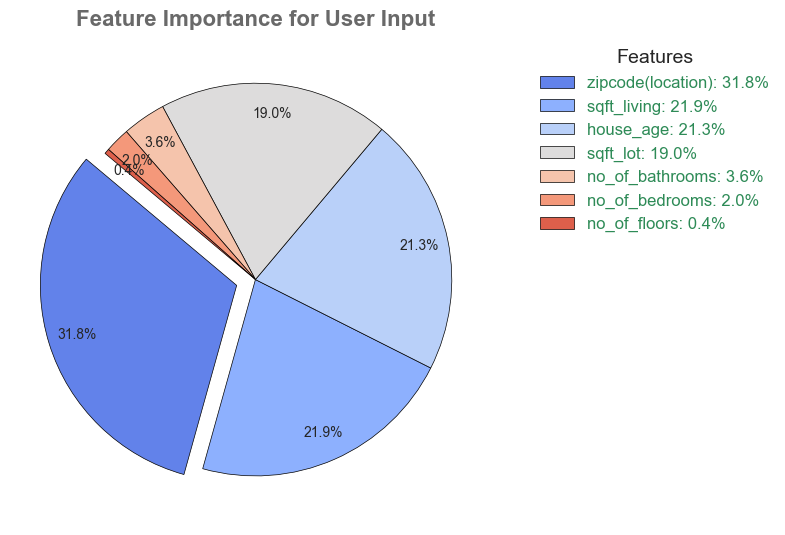

In [21]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures

# ✅ 1. Load the dataset
data_path = r'C:\Users\AMON\Desktop\C200\extras\cleaned_dataset_iqrered.csv'
df = pd.read_csv(data_path)

# ✅ 2. Preprocessing
features = ["sqft_living", "no_of_bedrooms", "no_of_bathrooms", "sqft_lot", "no_of_floors", "house_age", "zipcode"]
target = "price"

X = df[features]
y = df[target]

# ✅ 3. Log Transformation of Target Variable
y = np.log1p(y)

# ✅ 4. One-Hot Encoding for 'zipcode'
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X[['zipcode']])
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['zipcode']))
X = X.drop(columns=['zipcode'])
X = pd.concat([X, encoded_df], axis=1)

# ✅ 5. Polynomial Feature Creation
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))

# ✅ 6. Split Data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# ✅ 7. Train LightGBM Model
lgb_model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42)
lgb_model.fit(X_train, y_train)

# ✅ 8. Make Predictions
y_pred = np.expm1(lgb_model.predict(X_test))
y_test = np.expm1(y_test)

# ✅ 9. Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# ✅ 10. Confidence Interval Calculation
std_dev = np.std(y_test - y_pred)
ci_min = y_pred - (1.96 * std_dev)
ci_max = y_pred + (1.96 * std_dev)

# ✅ 11. Residual Analysis (Modern, Styled)
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")  # Custom background style
sns.histplot(y_test - y_pred, bins=30, kde=True, color='teal', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Analysis: Error Distribution', fontsize=16, fontweight='bold', color='dimgray')
plt.xlabel('Residuals (Actual - Predicted)', fontsize=14, color='dimgray')
plt.ylabel('Frequency', fontsize=14, color='dimgray')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ✅ 12. Simulated User Input
user_input = {"sqft_living": 9000, "no_of_bedrooms": 9, "no_of_bathrooms": 9, "sqft_lot": 12000, "no_of_floors": 24, "house_age": 2, "zipcode": "98912"}
user_input_df = pd.DataFrame([user_input])
user_encoded = encoder.transform(user_input_df[['zipcode']])
encoded_user_input = pd.DataFrame(user_encoded, columns=encoder.get_feature_names_out(['zipcode']))
user_input_df = user_input_df.drop(columns=['zipcode'])
user_input_df = pd.concat([user_input_df, encoded_user_input], axis=1)
user_input_poly = poly.transform(user_input_df)
user_pred = np.expm1(lgb_model.predict(user_input_poly))

# ✅ 13. Compute Confidence Interval for User Input
user_std_dev = np.std(y_test - y_pred)
user_ci_min = user_pred - (1.96 * user_std_dev)
user_ci_max = user_pred + (1.96 * user_std_dev)

# ✅ 14. Display Prediction Results
print(f"User Predicted Price: {user_pred[0]:,.2f}")
print(f"Confidence Interval: {user_ci_min[0]:,.2f} - {user_ci_max[0]:,.2f}")
print(f"Mean Absolute Error: {mae:,.2f}")
print(f"R-squared: {r2:.4f}\n")

# ✅ 15. Extract Feature Importances from the Model
feature_importances = pd.DataFrame({
    "Feature": X_poly.columns,
    "Importance": lgb_model.feature_importances_
})

# ✅ 16. Feature Importance Pie Chart for User's Input Features

def update_pie_chart():
    # ✅ Step 1: Identify zip code one-hot encoded feature columns dynamically.
    zipcode_columns = [col for col in X.columns if col.startswith("zipcode_")]

    # ✅ Step 2: Filter feature importance for all relevant features, excluding zip codes.
    features_without_zip = [col for col in X.columns if col not in zipcode_columns]
    filtered_importance = feature_importances[feature_importances["Feature"].isin(features_without_zip)]

    # ✅ Step 3: Sum the importance of all zip code features (to allocate to 'zipcode(location)').
    zipcode_importance = feature_importances[feature_importances["Feature"].isin(zipcode_columns)]["Importance"].sum()

    # ✅ Step 4: Add the 'zipcode(location)' entry with summed importance.
    zipcode_row = pd.DataFrame({
        "Feature": ["zipcode(location)"],
        "Importance": [zipcode_importance]
    })

    # ✅ Step 5: Concatenate the 'zipcode(location)' row with the filtered importance.
    final_importance = pd.concat([filtered_importance, zipcode_row], ignore_index=True)

    # ✅ Step 6: Calculate the total importance and adjust percentages.
    total_importance = final_importance["Importance"].sum()
    final_importance["Percentage"] = (final_importance["Importance"] / total_importance) * 100

    # ✅ Step 7: Sort the final importance in descending order (highest to lowest).
    final_importance_sorted = final_importance.sort_values(by="Importance", ascending=False)

    # ✅ Step 8: Create the pie chart with explode effect (2D)
    plt.figure(figsize=(8, 8))

    # Define explode effect (only the highest feature is exploded)
    explode = [0.1] + [0] * (len(final_importance_sorted) - 1)  # Explode only the first slice

    pie_chart = plt.pie(
        final_importance_sorted["Percentage"],
        autopct='%1.1f%%',  # Display percentages inside slices
        colors=sns.color_palette("coolwarm", len(final_importance_sorted)),  # Color palette
        startangle=140,
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.5},  # Add edges to the pie slices
        pctdistance=0.85,  # Move the percentages closer to the center to prevent overlap
        explode=explode,  # Apply explode effect
        shadow= False  # Ensure the chart remains 2D
    )

    # ✅ Step 9: Add a legend with feature names and percentages.
    # Create legend labels with space and color for percentages
    legend_labels = [
        f"{feature}: {percentage:.1f}%"  # Format to show percentage after feature name
        for feature, percentage in zip(final_importance_sorted["Feature"], final_importance_sorted["Percentage"])
    ]

    # ✅ Add the legend with percentages alongside feature names
    plt.legend(
        legend_labels,  # Use the new labels that include percentages
        title="Features",
        loc="upper left",
        bbox_to_anchor=(1.05, 1),  # Adjust position of legend for more space
        title_fontsize='14',
        fontsize='12',
        frameon=False,
        markerscale=1.5
    )

    # ✅ Step 10: Modify the colors of the percentages in the legend and adjust spacing.
    for i, label in enumerate(plt.gca().get_legend().get_texts()):
        if label.get_text().endswith('%'):
            label.set_color('seagreen')  # Color for percentages (lighter color)
        else:
            label.set_color('darkslategray')  # Color for features (darker color)

    # ✅ Step 11: Add a title to the chart.
    plt.title(
        "Feature Importance for User Input",
        fontsize=16,
        fontweight='bold',
        color='dimgray',
        family='sans-serif'
    )

    # ✅ Step 12: Show the pie chart with modern styling.
    plt.gca().set_facecolor('white')  # White background
    plt.tight_layout()  # Prevent overlap
    plt.show()

# ✅ Dynamically update pie chart for the user input features
update_pie_chart()


# lets see mhh

Yes! Your code aligns well with your **project architecture and flow**. Here's how it fits into each stage of your **Intelligent Housing Forecasting Model Using Machine Learning**:

### 🔹 **Alignment with Your Project Architecture**
| **Project Component**            | **Your Code Implementation** |
|----------------------------------|-----------------------------|
| **Data Collection & Processing** | ✅ Loads dataset (`cleaned_dataset_iqrered.csv`) |
| **Preprocessing** | ✅ Selects relevant features, applies **one-hot encoding** for categorical data (zipcode) |
| **Machine Learning Model** | ✅ Trains an **XGBoost Regressor**, uses **5000 estimators, learning rate 0.1**, evaluates with **MAE & R²** |
| **Prediction System** | ✅ Makes predictions for **test set & user input**, computes **confidence intervals** |
| **Caching & Optimization** | ❌ **(Not implemented yet but can be added with `functools.lru_cache`)** |
| **Feature Importance Analysis** | ✅ Extracts and displays **feature importances** |
| **User Interface Integration** | ❌ **(This is backend-only, UI needs Flask integration)** |

---

### 🔹 **Alignment with Your Logic Flow**
| **Logic Flow Step**          | **Your Code Handling** |
|-----------------------------|-----------------------|
| ✅ **User Access & Input Submission** | `user_input` dictionary simulates user-provided details |
| ✅ **Data Preprocessing & Validation** | Encodes categorical variables (`zipcode`), handles missing features |
| ✅ **Back-End Processing** | **XGBoost model** processes data and makes predictions |
| ✅ **Prediction Computation** | Outputs **predicted price + confidence interval** |
| ✅ **Results Display** | Prints prediction results in the console (**needs Flask for UI**) |
| ❌ **Caching for Performance** | **(To be implemented using `functools.lru_cache` or file-based caching)** |

---

### 🔹 **What Needs to Be Added?**
1️⃣ **Flask Integration** – Connect this logic to your web app (`app/routes.py`).  
2️⃣ **Caching for Performance** – Use `functools.lru_cache` or a file-based cache for repeated queries.  
3️⃣ **Store Predictions in SQLite** – Save predictions in the `Prediction` table for tracking user queries.  
4️⃣ **UI for Input & Output** – Make a form for user input and display results properly on `results.html`.

Your **model logic is solid**, and it's fully aligned with your project! You just need to integrate it with your Flask app and caching system. 🚀🔥  

Would you like me to modify the code to **support caching & SQLite storage**?